## **Kelompok G Data Mining (B)**
1. Aisyah Gefira (2006572945)
2. Aldinda Albanna (2006533295)
3. Faza Muthmainnah (2006523672)
4. Inez Aurellia Rosyana (2006571204)
5. Nurrochmi Andina (2006571103)
6. Valery Ongso Putri (2006570965)

Pengerjaan projek ini, mulai dari pemilihan topik, code, interpretasi, PPT, dan video dilakukan secara bersama oleh semua anggota kelompok melalui tatap muka langsung dan beberapa media, yaitu LINE, Google Meet, dan Discord.

**Pilihan Topik : Analisis Sentimen Pengguna Twitter terhadap Piala Dunia
2022 dengan keyword "pildun" dari tanggal 18 Desember 2022 - 20 Desember 2022**

##**Analisis Sentimen Pengguna Twitter pada Final Piala Dunia Qatar 2022**


**Tujuan**
1. Melakukan klasifikasi apakah Final Piala Dunia Qatar 2022 memiliki sentimen positif,  negatif, atau netral dari pengguna Twitter.
2. Menemukan informasi atau insight dari data hasil scraping Twitter.
3. Mengetahui akun Twitter yang berpengaruh.



**Dataset**
*   Scraping data tweet menggunakan module twint. 
*   Data yang diambil adalah data bahasa Indonesia
*   Rentang waktu: 18 Desember 2022 - 20 Desember 2022.
*   Kata kunci : “pildun”


###**Import Package**

In [ ]:
!pip install --upgrade git+https://github.com/kevctae/twint.git
!pip install nest_asyncio
!pip install unidecode

import datetime
import time
import re
import string 
import scipy.sparse
import nltk
import itertools
import tweepy
import re
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings; warnings.simplefilter('ignore')
from matplotlib.colors import ListedColormap
from html import unescape
from textblob import TextBlob
from tqdm import tqdm
from unidecode import unidecode
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tag import CRFTagger

from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# customer pipeline function
from sklearn.base import BaseEstimator, TransformerMixin #

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kevctae/twint.git to /tmp/pip-req-build-zqebnqjk
  Running command git clone -q https://github.com/kevctae/twint.git /tmp/pip-req-build-zqebnqjk
     |████████████████████████████████| 265 kB 28.3 MB/s 
     |████████████████████████████████| 385 kB 72.2 MB/s 
     |████████████████████████████████| 50 kB 8.3 MB/s 
     |████████████████████████████████| 288 kB 69.5 MB/s 
     |████████████████████████████████| 49 kB 7.3 MB/s 
     |████████████████████████████████| 59 kB 8.2 MB/s 
     |████████████████████████████████| 140 kB 50.0 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=39180 sha256=36cda3fa30a10f542359cfb8cbadd0942a0a8ed0d8749d4018378351dac8647d
  Stored in directory: /tmp/pip-ephem-wheel-cache-873wrs90/wheels/de/66/ce/1d0e7f533048436bc24ec9d2d55bc759542faa4fe80bc0b

In [ ]:
import nltk
nltk.download('punkt')

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 27.6 MB/s 


In [ ]:
import twint
import nest_asyncio

nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True
config.Retweets = True
config.Profile_full = True
"Done"

'Done'

### **Scraping Data**

In [ ]:
current_date = datetime.datetime(2022,12,18)
current_end_date = current_date + datetime.timedelta(days=3)
end_date = datetime.datetime(2022,12,21)

config.Search = 'pildun'
config.Limit = 10500
config.Lang = 'in'
config.Since = current_date.strftime("2022-12-18")
config.Until = current_end_date.strftime("2022-12-21")

twint.run.Search(config)
data1 = twint.storage.panda.Tweets_df
del twint, config, nest_asyncio
print(data1.shape)

data1.head()

(10515, 38)


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1605352334573256704,1605324825089945601,1.671581e+12,2022-12-20 23:59:57,+0000,,@SamFerkyFers10 @idextratime hebat darimana ur...,in,[],[],...,,,,,,"[{'screen_name': 'SamFerkyFers10', 'name': 'Sa...",,,,
1,1605351975775719425,1605282617234165761,1.671581e+12,2022-12-20 23:58:31,+0000,,@Fasa77342812 @rakkaustarina1 @idextratime Lah...,in,[],[],...,,,,,,"[{'screen_name': 'Fasa77342812', 'name': 'Fasa...",,,,
2,1605351517304721408,1605351517304721408,1.671581e+12,2022-12-20 23:56:42,+0000,,messi sengaja menang pildun biar bisa keluar d...,in,[],[],...,,,,,,[],,,,
3,1605350758920388608,1605228813805244416,1.671580e+12,2022-12-20 23:53:41,+0000,,@idextratime Bayangin lah sebelumnya 2014 kala...,in,[],[],...,,,,,,"[{'screen_name': 'idextratime', 'name': 'Extra...",,,,
4,1605350019648737280,1605324177959194625,1.671580e+12,2022-12-20 23:50:45,+0000,,"@UTDwib @whathevuck @idextratime nah itu, mung...",in,[],[],...,,,,,,"[{'screen_name': 'UTDwib', 'name': 'Mindro💎', ...",,,,


In [ ]:
# Hasil scraping berupa data1 yang diperoleh (dimasukkan ke dalam github)
df = pd.read_csv("https://raw.githubusercontent.com/nandinaa/Project-UAS-Datmin/main/Data_FinalPildun_Twitter.csv")
df

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1605352334573256704,1605324825089945601,1.671581e+12,2022-12-20 23:59:57,0,NaN,@SamFerkyFers10 @idextratime hebat darimana ur...,in,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SamFerkyFers10', 'name': 'Sa...",NaN,NaN,NaN,NaN
1,1,1605351975775719425,1605282617234165761,1.671581e+12,2022-12-20 23:58:31,0,NaN,@Fasa77342812 @rakkaustarina1 @idextratime Lah...,in,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Fasa77342812', 'name': 'Fasa...",NaN,NaN,NaN,NaN
2,2,1605351517304721408,1605351517304721408,1.671581e+12,2022-12-20 23:56:42,0,NaN,messi sengaja menang pildun biar bisa keluar d...,in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1605350758920388608,1605228813805244416,1.671580e+12,2022-12-20 23:53:41,0,NaN,@idextratime Bayangin lah sebelumnya 2014 kala...,in,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'idextratime', 'name': 'Extra...",NaN,NaN,NaN,NaN
4,4,1605350019648737280,1605324177959194625,1.671580e+12,2022-12-20 23:50:45,0,NaN,"@UTDwib @whathevuck @idextratime nah itu, mung...",in,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'UTDwib', 'name': 'Mindro💎', ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10505,10505,1604540611100807168,1604540611100807168,1.671387e+12,2022-12-18 18:14:27,0,NaN,Juara pildun senam jantung dulu 😁😋,in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10506,10506,1604540606042501121,1604517116996354049,1.671387e+12,2022-12-18 18:14:26,0,NaN,@Rianyoga__ memeriahkan pildun niate,in,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Rianyoga__', 'name': 'Hoooom...",NaN,NaN,NaN,NaN
10507,10507,1604540605480448001,1604539816032759809,1.671387e+12,2022-12-18 18:14:25,0,NaN,@babyjaeruto abis nnton pildun k,in,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'babyjaeruto', 'name': 'sar',...",NaN,NaN,NaN,NaN
10508,10508,1604540603798552577,1604536870813446146,1.671387e+12,2022-12-18 18:14:25,0,NaN,@mahpudfour7 @The_RedsIndo Ya mau lu ayahnya r...,in,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'mahpudfour7', 'name': 'mahpu...",NaN,NaN,NaN,NaN


### **Data Cleaning**

Berikut tahapan yang dilakukan saat melakukan data cleaning:
*   Memeriksa missing value
*   Menghapus baris yang duplikat berdasarkan teks tweet
*   Menghapus tweet dari akun @jogjamnfs karena tidak memuat kata “pildun”
*   Menghilangkan ‘@user ’ (mention) dari semua teks tweet
*   Menghilangkan emoji
*   Mengganti teks tweet dengan huruf kecil
*   Menghilangkan link yang terdapat pada tweet
*   Menghilangkan simbol
*   Menghilangkan kata-kata yang tidak diperlukan (Custom StopWords)
*   Mengganti kata slang dengan kata baku
*   Melakukan stemming
*   Melakukan lematisasi


In [ ]:
df = df[['date', 'tweet' ,'username', 'link']]
df.head()

,date,tweet,username,link
0,2022-12-20 23:59:57,@SamFerkyFers10 @idextratime hebat darimana ur...,Fasa77342812,https://twitter.com/Fasa77342812/status/160535...
1,2022-12-20 23:58:31,@Fasa77342812 @rakkaustarina1 @idextratime Lah...,chaeryeohng,https://twitter.com/chaeryeohng/status/1605351...
2,2022-12-20 23:56:42,messi sengaja menang pildun biar bisa keluar d...,llhamarians,https://twitter.com/llhamarians/status/1605351...
3,2022-12-20 23:53:41,@idextratime Bayangin lah sebelumnya 2014 kala...,anwartanumyn,https://twitter.com/anwartanumyn/status/160535...
4,2022-12-20 23:50:45,"@UTDwib @whathevuck @idextratime nah itu, mung...",baber168,https://twitter.com/baber168/status/1605350019...


In [ ]:
# Cek missing value
df.isna().sum()

date        0
tweet       0
username    0
link        0
dtype: int64

In [ ]:
# Drop data duplikat berdasarkan teks tweet
df.drop_duplicates(subset='tweet', keep='first', inplace=True, ignore_index=False)
df.shape

(10468, 4)

In [ ]:
# Menghapus seluruh tweet dari akun '@jogjamnfs' karena setelah di cek, terdapat banyak tweet yang tidak memuat kata 'pildun' masuk ke hasil scraping sehingga diasumsikan tidak valid
# Diperkirakan terjadi karena pada saat itu akun '@jogjamnfs' menggunakan kata pildun pada nama akun, tetapi saat ini akun tersebut di suspend
df.drop(df[df['username'] == "jogjamnfs"].index, inplace = True)
df.shape

(10090, 4)

In [ ]:
# Membuat list stop word untuk keperluan cleaning text
StopWords_id = ['lah', 'kan', 'nah', 'lah', 'itu', 'deh', 'tuh', 'sih', 'alchemyofsouls2ep4', 'ometvbugil', 'indosiar', 'wkwk', 'hilih', 'huhuhu', 'hehehehe', 'wkkwkw', 'waokwkwk', 'aowkwowk', 'wkwkwkwk', 'wkwkwkwkwkwkwk', 'RT', 'yang', 'yg', 'gue', 'gw', 'gua', 'aku', 'untuk', 'utk', 'pada', 'sedang', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika','sehingga', 'kembali', 'dan', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'sih', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'pa', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'juga', 'mari', 'nanti', 'oh', 'setiap', 'sesuatu', 'pasti', 'saja', 'toh', 'ya', 'walau', 'pas', 'tolong', 'tentu', 'apalagi', 'bagaimanapun', 'oalah', 'hoalah','sampe']
StopWords_id = set(StopWords_id)

In [ ]:
# Membuat dict slang untuk keperluan cleaning text
slangS = pd.read_csv('https://raw.githubusercontent.com/inezaurelliaa/Project-Data-Mining/main/slang.csv').to_dict()

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip())) # lower text
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol
    Tokens = TextBlob(docx).words # Tokenisasi 
    docx = ' '.join([t for t in Tokens if str(t) not in StopWords_id and len(t)>=2]) # Stopwords filtering
    return docx

In [ ]:
# Function untuk mengubah slang text menjadi kata baku
def SlangText(txt):
  T = TextBlob(txt).words
  for i,t in enumerate(T):
    if t in slangS.keys():
        T[i] = slangS[t]
  docx = ' '.join(T)
  return docx

In [ ]:
# Function untuk stemming
def stem_words(txt):
  txt = stemmer.stem(txt)
  return txt

In [ ]:
# Function untuk lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Dilakukan cleaning menggunakan function yang sudah dibuat
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*") # remove twitter handles (@user)
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: remove_emoji(x)) # remove emoji
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: cleanText(x)) # lower text, remove link, symbol, & stopwords
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: SlangText(x)) # mengganti kata slang dalam bentuk baku

In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: stem_words(x)) # melakukan stemming
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: lemmatize_words(x)) # melakukan lematisasi
df.sample(10)

,date,tweet,username,link,clean_tweet
8236,2022-12-18 19:20:09,"@UPIfess info next batch nya dong kapan, ga se...",rachimvdr,https://twitter.com/rachimvdr/status/160455714...,info next batch nya dong kapan ga sempet ikut ...
1581,2022-12-19 18:33:14,gue ga ngikutin pildun tp meme2 nya berkualita...,kkolumbina,https://twitter.com/kkolumbina/status/16049077...,ga ngikutin pildun tp meme2 nya kualitas
7972,2022-12-18 19:34:14,"we apaan ni bangun"" status orang"" pada nontoni...",carnaival,https://twitter.com/carnaival/status/160456068...,we apa ni bangun status orang nontonin pildun ...
3923,2022-12-19 05:59:44,Pildun selanjutnya apa Messi udh gantung sepat...,Hana_restu20,https://twitter.com/Hana_restu20/status/160471...,pildun lanjut apa messi udh gantung sepatu
6991,2022-12-18 22:52:47,Udah orang selesai nonton pildun barula si Amu...,fatmasarizki,https://twitter.com/fatmasarizki/status/160461...,udah orang selesai nonton pildun barula si amu...
7549,2022-12-18 20:25:02,"@idextratime foto dodo cium trophy pildun, ada...",stadiuvm,https://twitter.com/stadiuvm/status/1604573475...,foto dodo cium trophy pildun ada
8358,2022-12-18 19:15:22,"Saat people sibuk komenin teknik² bola pildun,...",YourOnlyLandak,https://twitter.com/YourOnlyLandak/status/1604...,people sibuk komenin teknik2 bola pildun sibuk...
7308,2022-12-18 21:35:22,@friskalard yaampun kuat yak nonton pildun wkwkwk,neenanin,https://twitter.com/neenanin/status/1604591174...,yaampun kuat yak nonton pildun wkwkwk
8537,2022-12-18 19:09:16,Ada mbappe bikin pildun makin berkesan tau. Me...,mendobrakmu,https://twitter.com/mendobrakmu/status/1604554...,ada mbappe bikin pildun makin kesan tau pildun...
5748,2022-12-19 01:43:14,@Hendra_Syndrome @idextratime Gak bang. Udah s...,oalahudin,https://twitter.com/oalahudin/status/160465355...,gak bang udah sekarang messi baik fan netral p...


In [ ]:
# Diperoleh data hasil cleaning untuk digunakan untuk sentiment analysis (dimasukkan ke dalam github)
df = pd.read_csv("https://raw.githubusercontent.com/nandinaa/Project-UAS-Datmin/main/DataLengkap.csv")
df = df.drop('label', axis=1)
df.sample(10)

,date,username,link,clean_tweet,tweet
4382,2022-12-19 04:10:30,KAIANARKI,https://twitter.com/KAIANARKI/status/160469061...,saudara laki saudara laki sekali mau tanya pil...,@aswanggae @marcticello Bro bro sekalian. Mau ...
4745,2022-12-19 03:18:55,awaranggana,https://twitter.com/awaranggana/status/1604677...,maaf jago argentina,@hamisholt Sorry jagoanku argentina.
3774,2022-12-19 05:54:45,novaldzky,https://twitter.com/novaldzky/status/160471684...,sama sebal muka pa pegang piala pildun,@sychoiswari @goal Sama wkwk dia tengil mukany...
4437,2022-12-19 04:02:54,riyanhargianto,https://twitter.com/riyanhargianto/status/1604...,maksud kontribusi aguero pildun 2022 bang kala...,@Lord_Soapking @kepinteraan @idextratime maksu...
7589,2022-12-18 19:33:58,Kang_vector,https://twitter.com/Kang_vector/status/1604560...,tonton final pildun tadi rasa tonton sepakbola...,Setelah menonton final pildun td rasanya menon...
1789,2022-12-19 15:52:20,tegoeh_snk,https://twitter.com/tegoeh_snk/status/16048672...,selesai sudah debat messi better than ronaldo ...,@The_RedsIndo selesai sudah perdebatannya.. ME...
5418,2022-12-19 01:45:25,chelseaindo_ofc,https://twitter.com/chelseaindo_ofc/status/160...,iya harus neng ya kounde gagal juara pildun,Oh iya harusnya kita seneng yak. Kan Kounde ga...
478,2022-12-20 13:13:55,nextjack1995,https://twitter.com/nextjack1995/status/160518...,inj fan iler panas emosi banget kayak sampai a...,@komatkamid @nugrahasyah @idextratime Inj fans...
8458,2022-12-18 18:58:27,dusyness,https://twitter.com/dusyness/status/1604551686...,lebih seru final pildun 2014,lebih seru final pildun 2014
7995,2022-12-18 19:14:20,rizkiansorinst,https://twitter.com/rizkiansorinst/status/1604...,doain jodoh gaes pildun ikut sudah ada nan rumah,@idextratime Doain gua berjodoh ya gaes agar n...


### **EDA**

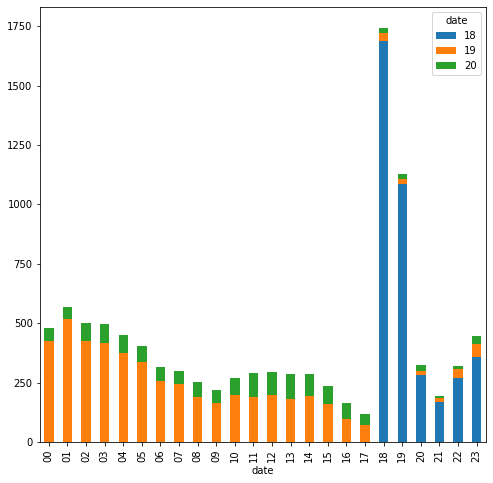

In [ ]:
# Melihat pada jam dan hari apa saja pengguna twitter menulis tweet tentang final pildun
df['date']= pd.to_datetime(df['date']) # Mengubah kolom 'Date' ke tipe data datetime
CT=pd.crosstab(index=df['date'].dt.strftime('%H'), columns=df['date'].dt.strftime('%d'))
CT.plot(kind="bar", figsize=(8,8), stacked=True)

**Interpretasi**
*   Berdasarkan visualisasi di atas, tweet dengan keyword 'pildun' paling banyak dikirim pada tanggal 18 Desember 2022 pukul 18.00-19.00 WIB dimana pada saat menjelang Final Piala Dunia 2022. Hal ini bisa diinterpretasikan bahwa mayoritas pengguna twitter antusias dalam menyambut Final Piala Dunia 2022. 
*   Pada tanggal 19 Desember 2022, pengguna Twitter paling banyak menulis tweet pada pukul 1 pagi, yaitu saat final piala dunia berlangsung.
*   Pada tanggal 20 Desember 2022, beberapa hari setelah final selesai, tweet mengenai “pildun” mengalami pengurangan dibandingkan hari sebelumnya.

### **Word Cloud**

In [ ]:
from wordcloud import WordCloud

In [ ]:
StopWords_id = pd.read_csv("https://raw.githubusercontent.com/inezaurelliaa/Project-Data-Mining/main/stopword.txt")
MoreStopWords_id = ["tidak", "jadi", "kamu", "sudah", "banget", "lihat", "sama", "berapa","buat","pildun","jadi","kalau","kali","habis","saja","apa","ini","akhir","sama","baik","banyak","juga","lagi",'yang',
                    'yg', 'gue', 'gw', 'gua', 'aku', 'untuk', 'utk', 'pada', 'sedang', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika','sehingga', 'kembali',
                    'dan', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal',
                    'ketika', 'adalah', 'itu', 'dalam', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda',
                    'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya',
                    'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'boleh', 'dapat',
                    'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'seharusnya', 'sebetulnya', 'setiap', 'setidaknya',
                    'sesuatu', 'pasti', 'saja', 'toh', 'ya', 'walau', 'tolong', 'tentu', 'apalagi', 'bagaimanapun', 'oalah', 'hoalah', 'pildun', 'di', 'ini', 'saya', 'kamu', 'dan', 'karena',
                    'saja', 'siapa', 'juga', 'kalau', 'dengan', 'dia', 'dari', 'sudah', 'dapat', 'masih', 'sampai', 'nya', 'akan', 'sih', 'pa', 'https', 'dan', 'ini', 'yang', 'banget', 't', 'banget',
                    'sudah', 'sama', 'nah', 'lah', 'itu', 'yang', 'pas','yah', 'ngga', 'nggak',"main","mau","lebih","kemarin","cuma","sekarang","dulu", 'bukan','dunia',
                    "tahu",'bakal','baru','orang','kayak','deh','mah','bang','jangan','sayang','bisa','doang','semua','jam','hari','memang','tadi','bahkan','tiap','lalu','terus','bagaimana',
                    'hari','biar','kok','wkwkwk','gitu','gara','emang','gara2','bikin','padahal','melulu','neng','saling','nonton','final','tahun','2022']

In [ ]:
def Clean_Tweet(txt):
    Tokens = TextBlob(txt).words # Tokenisasi 
    txt= ' '.join([t for t in Tokens if str(t) not in StopWords_id and str(t) not in MoreStopWords_id])
    txt = re.split('\W+', txt)
    txt = [word for word in txt if word not in df]
    return txt

**Word Cloud Keseluruhan**


In [ ]:
# Word Cloud dari Seluruh Data Hasil Scrapping
df['teks'] = df['clean_tweet'].apply(lambda x: Clean_Tweet(x))
df.sample(5)

,date,username,link,clean_tweet,label,tweet,teks
4685,2022-12-19 03:27:35,asha_sanah,https://twitter.com/asha_sanah/status/16046798...,mbappe jaleh dn emosi dk ang anjg messi dn man...,NaN,@padangmenfess Mbappe: lah jaleh dn emosi dk a...,"[mbappe, jaleh, dn, emosi, dk, ang, anjg, mess..."
4322,2022-12-19 04:20:45,__jvles__,https://twitter.com/__jvles__/status/160469319...,iya nder cewek baru nyemplung nonton pildun cu...,NaN,@Askrlfess iya nder gw cewe yg baru nyemplung ...,"[iya, nder, cewek, nyemplung, liatin, cogan, k..."
6212,2022-12-19 00:04:13,helmyyee,https://twitter.com/helmyyee/status/1604628632...,bakal tidak banding negara susah lolo euro pildun,NaN,"@jpcoen_ @idextratime Bakal gak sebanding, neg...","[banding, negara, susah, lolo, euro]"
1039,2022-12-20 05:34:14,hngagstya,https://twitter.com/hngagstya/status/160507407...,aduh salah server tika final pildun tika,0.0,"@wirastutika duh salah server Tika, final pild...","[aduh, salah, server, tika, tika]"
4273,2022-12-19 04:31:25,diantharis,https://twitter.com/diantharis/status/16046958...,udahan kali jadi wasit pildun,NaN,@awaranggana Udahan kali jadi wasit pildun.,"[udahan, wasit]"


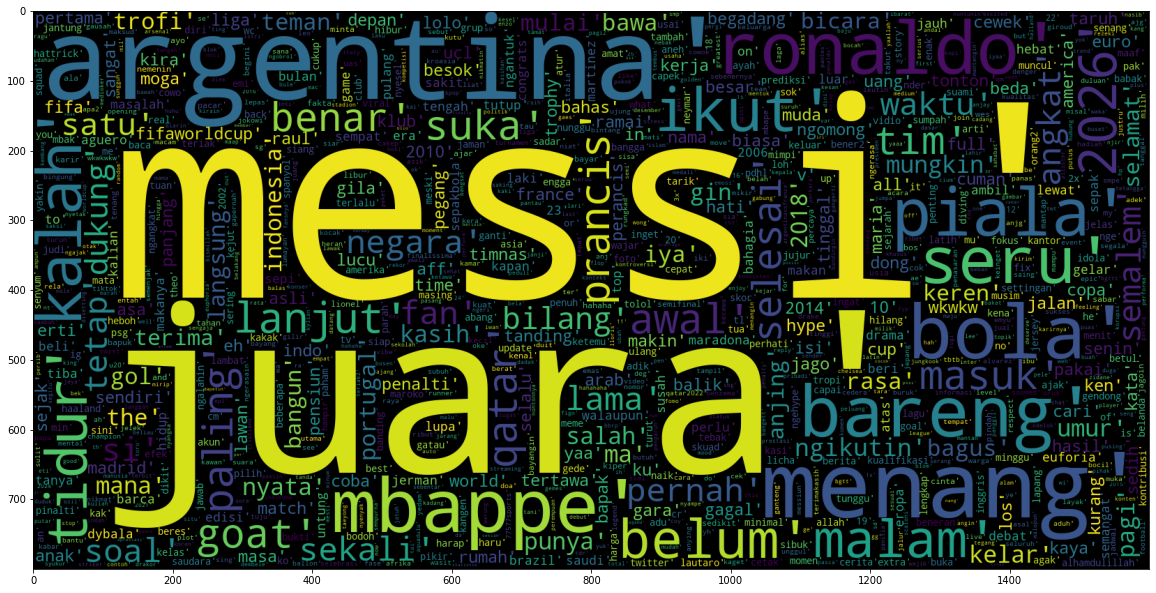

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(",".join([str(i) for i in df['teks']]))
plt.imshow(wc)

Berdasarkan word cloud dari seluruh data hasil scraping, terlihat bahwa Messi, Juara, Argentina, Menang, Mbappe menjadi kata yang paling banyak dibicarakan oleh pengguna twitter pada 18 Des 2022 - 20 Des 2022.

**Word Cloud Sentimen Hasil Labeling**


In [ ]:
dfSentimen = pd.read_csv("https://raw.githubusercontent.com/inezaurelliaa/Project-Data-Mining/main/Clean%20Tweet.csv")
dfSentimen.head()

,date,username,link,tweet,clean_tweet,label
0,2022-12-20 23:59:57,Fasa77342812,https://twitter.com/Fasa77342812/status/160535...,@SamFerkyFers10 @idextratime hebat darimana ur...,hebat darimana uruguay berapa kali masuk final...,-1
1,2022-12-20 23:58:31,chaeryeohng,https://twitter.com/chaeryeohng/status/1605351...,@Fasa77342812 @rakkaustarina1 @idextratime Lah...,diomongin sepakbola not their player sepakbola...,-1
2,2022-12-20 23:56:42,llhamarians,https://twitter.com/llhamarians/status/1605351...,messi sengaja menang pildun biar bisa keluar d...,messi sengaja menang pildun biar bisa keluar p...,0
3,2022-12-20 23:53:41,anwartanumyn,https://twitter.com/anwartanumyn/status/160535...,@idextratime Bayangin lah sebelumnya 2014 kala...,bayangin belum 2014 kalah final rasa banget eu...,1
4,2022-12-20 23:50:45,baber168,https://twitter.com/baber168/status/1605350019...,"@UTDwib @whathevuck @idextratime nah itu, mung...",nah mungkin ngerasa beri bebas sama pihak sele...,-1


In [ ]:
def clean_tweet(txt):
    Tokens = TextBlob(txt).words # Tokenisasi 
    txt= ' '.join([t for t in Tokens if str(t) not in StopWords_id and str(t) not in MoreStopWords_id])
    txt = re.split('\W+', txt)
    txt = [word for word in txt if word not in dfSentimen]
    return txt

In [ ]:
dfSentimen['teks'] = dfSentimen['clean_tweet'].apply(lambda x: clean_tweet(x))

In [ ]:
# Dataframe untuk masing-masing sentiment
df_clean_pos = dfSentimen['teks'][dfSentimen['label']==1] # Data hasil labeling dengan sentimen positif
df_clean_neg = dfSentimen['teks'][dfSentimen['label']==-1] # Data hasil labeling dengan sentimen negatif
df_clean_neu = dfSentimen['teks'][dfSentimen['label']==0] # Data hasil labeling dengan sentimen netral

**Positive Word Cloud**

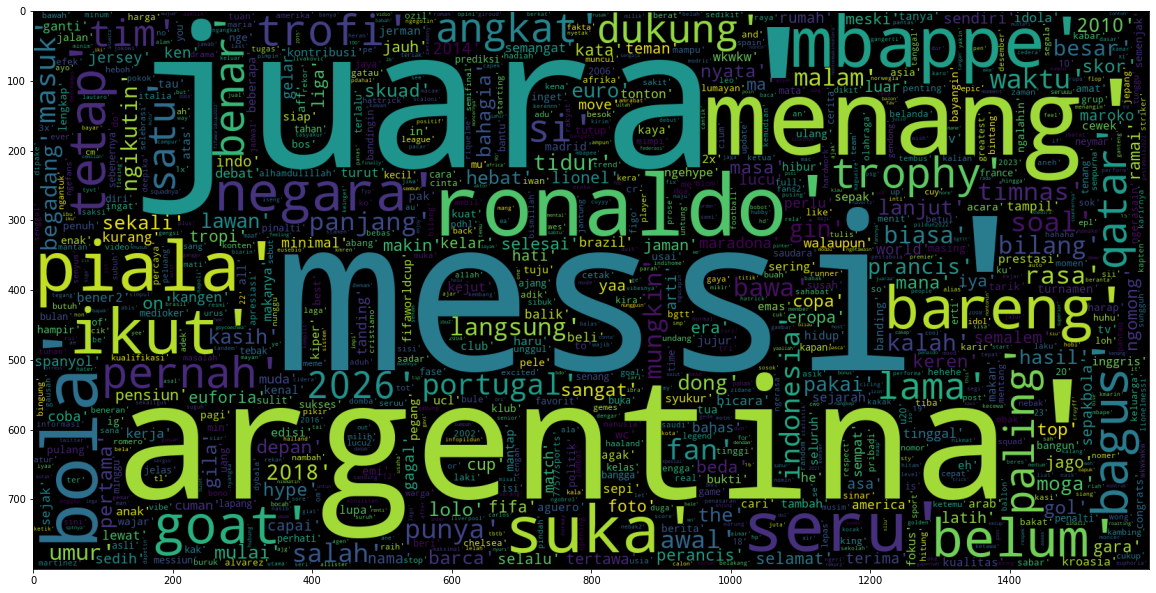

In [ ]:
plt.figure(figsize = (20,20))
wc1 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(",".join([str(i) for i in df_clean_pos]))
plt.imshow(wc1)

Berdasarkan word cloud dari seluruh data sentimen positif, terlihat bahwa Juara, Argentina, Messi, Menang, Mbappe menjadi kata yang paling banyak dibicarakan oleh pengguna twitter pada 18 Des 2022 - 20 Des 2022.

**Negative Word Cloud**

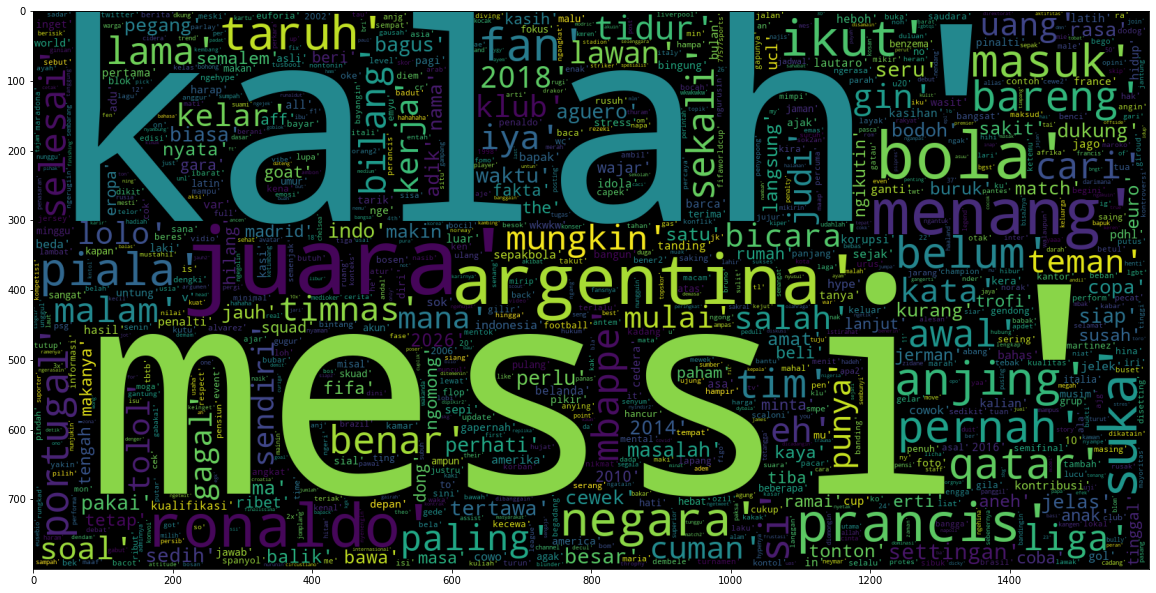

In [ ]:
plt.figure(figsize = (20,20))
wc2 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(",".join([str(i) for i in df_clean_neg]))
plt.imshow(wc2)

Berdasarkan word cloud dari seluruh data sentimen negatif, terlihat bahwa Kalah, Messi, Argentina, Taruh, Juara menjadi kata yang paling banyak dibicarakan oleh pengguna twitter pada 18 Des 2022 - 20 Des 2022.

**Neutral Word Cloud**

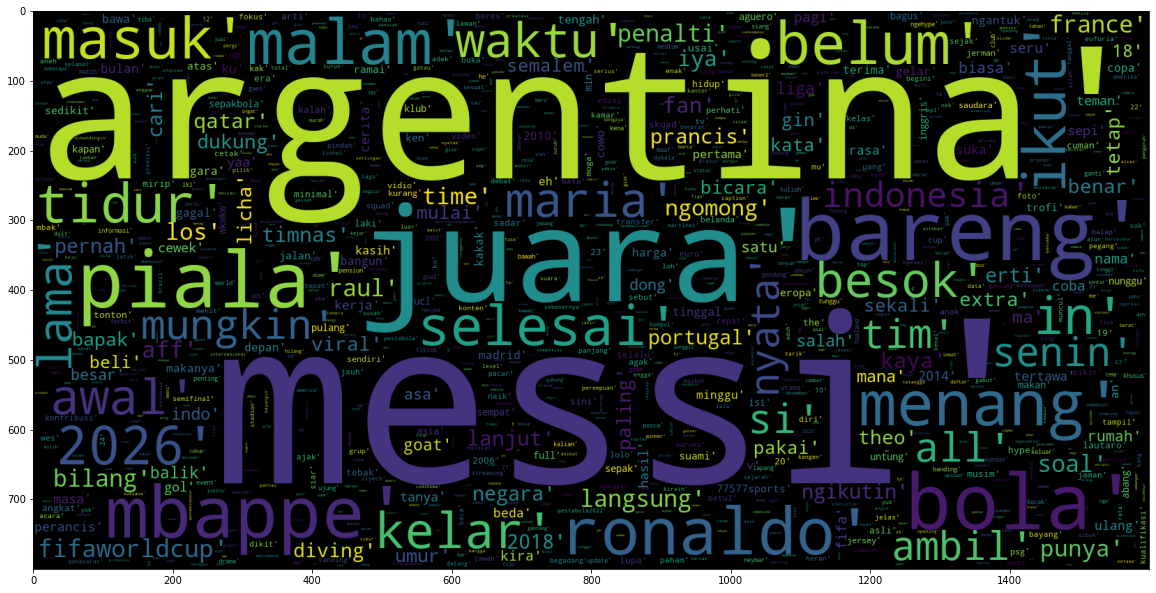

In [ ]:
plt.figure(figsize = (20,20))
wc3 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(",".join([str(i) for i in df_clean_neu]))
plt.imshow(wc3)

Berdasarkan word cloud dari seluruh data sentimen netral, terlihat bahwa Argentina, Messi, Juara, Piala, Ronaldo menjadi kata yang paling banyak dibicarakan oleh pengguna twitter pada 18 Des 2022 - 20 Des 2022

###**Sentiment Analysis**

**Mencari sentimen data tweet menggunakan data hasil translate**

In [ ]:
from textblob import TextBlob

def translate(x):
    try:
        blob = TextBlob(x)
        return (str(blob.translate(from_lang = 'id', to = 'en')))
    except: 
        return None

In [ ]:
df['translate'] = df['clean_tweet'].apply(lambda x: translate(x))

In [ ]:
#Menambah kolom time_hour untuk melihat persebaran jam tweet
df['time_hour'] = pd.to_datetime(df['date']).dt.hour
df

,date,username,link,clean_tweet,tweet,translate,time_hour
0,2022-12-20 23:59:57,Fasa77342812,https://twitter.com/Fasa77342812/status/160535...,hebat darimana uruguay berapa kali masuk final...,@SamFerkyFers10 @idextratime hebat darimana ur...,great from where did Uruguay enter the final o...,23
1,2022-12-20 23:58:31,chaeryeohng,https://twitter.com/chaeryeohng/status/1605351...,diomongin sepakbola not their player sepakbola...,@Fasa77342812 @rakkaustarina1 @idextratime Lah...,Talking about football not their soccer player...,23
2,2022-12-20 23:56:42,llhamarians,https://twitter.com/llhamarians/status/1605351...,messi sengaja menang pildun biar bisa keluar p...,messi sengaja menang pildun biar bisa keluar d...,Messi deliberately won Pildun so he could leav...,23
3,2022-12-20 23:53:41,anwartanumyn,https://twitter.com/anwartanumyn/status/160535...,bayangin belum 2014 kalah final rasa banget eu...,@idextratime Bayangin lah sebelumnya 2014 kala...,Imagine not yet 2014 losing the final taste of...,23
4,2022-12-20 23:50:45,baber168,https://twitter.com/baber168/status/1605350019...,nah mungkin ngerasa beri bebas sama pihak sele...,"@UTDwib @whathevuck @idextratime nah itu, mung...",Well maybe I feel free to give the same as the...,23
...,...,...,...,...,...,...,...
10085,2022-12-18 18:14:27,firmandaeva,https://twitter.com/firmandaeva/status/1604540...,juara pildun senam jantung dulu,Juara pildun senam jantung dulu 😁😋,heart gymnastic pildun champion first,18
10086,2022-12-18 18:14:26,Teguhpmbd_,https://twitter.com/Teguhpmbd_/status/16045406...,riah pildun niate,@Rianyoga__ memeriahkan pildun niate,RIAH PILDUN NIATE,18
10087,2022-12-18 18:14:25,lisamyangggg,https://twitter.com/lisamyangggg/status/160454...,habis nonton pildun,@babyjaeruto abis nnton pildun k,After watching pildun,18
10088,2022-12-18 18:14:25,Herwinwijaya14,https://twitter.com/Herwinwijaya14/status/1604...,mau kamu ayah ronaldo bukan tolak ukur oke kla...,@mahpudfour7 @The_RedsIndo Ya mau lu ayahnya r...,Want you Ronaldo's father is not a benchmark o...,18


In [ ]:
dfTranslate = df[['date', 'username', 'link', 'clean_tweet', 'translate', 'tweet', 'time_hour']]

In [ ]:
dfTranslate = pd.read_csv("https://raw.githubusercontent.com/nandinaa/Project-UAS-Datmin/main/DataCleanTweetTranslate.csv")
dfTranslate['translate']=dfTranslate['translate'].astype(str)
dfTranslate.head()

,date,username,link,clean_tweet,translate,tweet,time_hour
0,2022-12-20 23:59:57,Fasa77342812,https://twitter.com/Fasa77342812/status/160535...,hebat darimana uruguay berapa kali masuk final...,great from where did Uruguay enter the final o...,@SamFerkyFers10 @idextratime hebat darimana ur...,23
1,2022-12-20 23:58:31,chaeryeohng,https://twitter.com/chaeryeohng/status/1605351...,diomongin sepakbola not their player sepakbola...,Talking about football not their soccer player...,@Fasa77342812 @rakkaustarina1 @idextratime Lah...,23
2,2022-12-20 23:56:42,llhamarians,https://twitter.com/llhamarians/status/1605351...,messi sengaja menang pildun biar bisa keluar p...,Messi deliberately won Pildun so he could leav...,messi sengaja menang pildun biar bisa keluar d...,23
3,2022-12-20 23:53:41,anwartanumyn,https://twitter.com/anwartanumyn/status/160535...,bayangin belum 2014 kalah final rasa banget eu...,Imagine not yet 2014 losing the final taste of...,@idextratime Bayangin lah sebelumnya 2014 kala...,23
4,2022-12-20 23:50:45,baber168,https://twitter.com/baber168/status/1605350019...,nah mungkin ngerasa beri bebas sama pihak sele...,Well maybe I feel free to give the same as the...,"@UTDwib @whathevuck @idextratime nah itu, mung...",23


In [ ]:
# Function Subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

# Function Polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [ ]:
dfTranslate['subjectivity'] = dfTranslate['translate'].apply(getSubjectivity)
dfTranslate['polarity'] = dfTranslate['translate'].apply(getPolarity)
dfTranslate.head(10)

,date,username,link,clean_tweet,translate,tweet,time_hour,subjectivity,polarity
0,2022-12-20 23:59:57,Fasa77342812,https://twitter.com/Fasa77342812/status/160535...,hebat darimana uruguay berapa kali masuk final...,great from where did Uruguay enter the final o...,@SamFerkyFers10 @idextratime hebat darimana ur...,23,0.601136,0.309091
1,2022-12-20 23:58:31,chaeryeohng,https://twitter.com/chaeryeohng/status/1605351...,diomongin sepakbola not their player sepakbola...,Talking about football not their soccer player...,@Fasa77342812 @rakkaustarina1 @idextratime Lah...,23,0.283333,0.214286
2,2022-12-20 23:56:42,llhamarians,https://twitter.com/llhamarians/status/1605351...,messi sengaja menang pildun biar bisa keluar p...,Messi deliberately won Pildun so he could leav...,messi sengaja menang pildun biar bisa keluar d...,23,0.000000,0.000000
3,2022-12-20 23:53:41,anwartanumyn,https://twitter.com/anwartanumyn/status/160535...,bayangin belum 2014 kalah final rasa banget eu...,Imagine not yet 2014 losing the final taste of...,@idextratime Bayangin lah sebelumnya 2014 kala...,23,0.857143,0.119048
4,2022-12-20 23:50:45,baber168,https://twitter.com/baber168/status/1605350019...,nah mungkin ngerasa beri bebas sama pihak sele...,Well maybe I feel free to give the same as the...,"@UTDwib @whathevuck @idextratime nah itu, mung...",23,0.658333,-0.025000
5,2022-12-20 23:48:39,iiiiyaaaan,https://twitter.com/iiiiyaaaan/status/16053494...,balik pildun hebat let see in premier league,behind the great pildun Let See in Premier League,"Balik dari pildun gacor, lets see in premier l...",23,0.725000,0.200000
6,2022-12-20 23:47:50,TwitKacangAjaib,https://twitter.com/TwitKacangAjaib/status/160...,tidak sekali bangunin kalau ronaldo deh menang...,It doesn't wake up once if Ronaldo wins pildun,@Bayy0705 @idextratime Gk sekalian bangunin kl...,23,0.200000,0.300000
7,2022-12-20 23:46:54,UTDwib,https://twitter.com/UTDwib/status/160534905113...,lebih tepat dia rangkul main sepakbola jual ma...,"More precisely, he embraces playing football s...",@baber168 @whathevuck @idextratime Lebih tepat...,23,0.546667,0.103333
8,2022-12-20 23:42:32,thefifthramiel,https://twitter.com/thefifthramiel/status/1605...,yah andil ronaldo belum mana ada orang portuga...,"well, the share of Ronaldo is not yet there ar...","@idextratime Yah itu andil ronaldo, sebelumnya...",23,0.633333,0.100000
9,2022-12-20 23:39:07,suucciii,https://twitter.com/suucciii/status/1605347094...,rasa mbappe pa final pildun,taste mbappe pa final pildun,@Rizxfa itulah yang dirasakan mbappe pas final...,23,1.000000,0.000000


In [ ]:
# Labeling Sentiment
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

dfTranslate['sentiment'] = dfTranslate['polarity'].apply(getSentiment)

In [ ]:
num = ['time_hour','subjectivity','polarity']
cat = ['username','sentiment']
dfTranslate[num].describe()

,time_hour,subjectivity,polarity
count,10090.000000,10090.000000,10090.000000
mean,11.980575,0.395931,0.096895
std,7.402695,0.332971,0.242798
min,0.000000,0.000000,-1.000000
25%,5.000000,0.000000,0.000000
50%,13.000000,0.400000,0.000000
75%,18.000000,0.650000,0.230417
max,23.000000,1.000000,1.000000


**Interpretasi**
*   Berdasarkan subjektivitas, rata-rata mendapatkan nilai 0,39 yang berarti sentiment cenderung bersifat objektif.
*   Berdasarkan polaritas, rata-rata mendapat nilai 0,09 yang berarti sentiment cenderung netral hingga positif.



In [ ]:
# Function untuk menghitung banyaknya tweet tiap sentiment
def percent_data(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

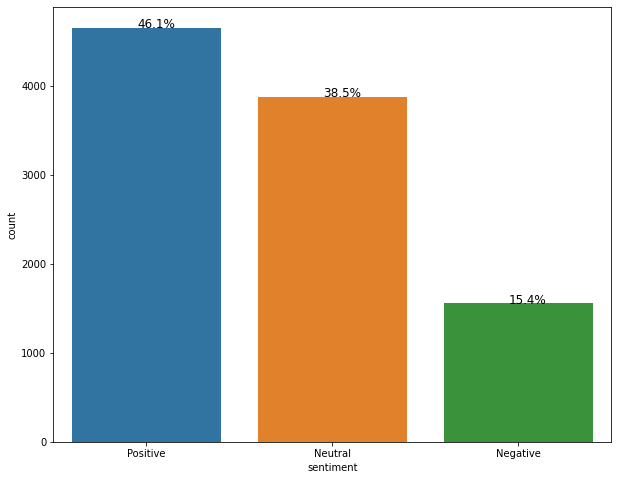

In [ ]:
plt.figure(figsize = (10,8))
ax = sns.countplot(data=dfTranslate, x='sentiment')
percent_data(ax,dfTranslate.sentiment)

**Interpretasi**:

Terlihat bahwa sebagian besar data merupakan sentimen positif.

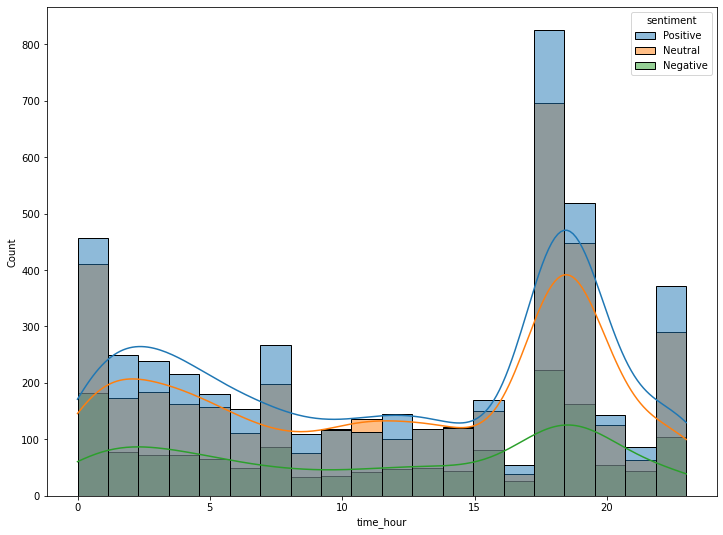

In [ ]:
plt.figure(figsize = (12,9))
sns.histplot(data=dfTranslate, x="time_hour", kde=True,hue = 'sentiment')

**Interpretasi:**
Grafik di atas menunjukkan traffic tweet berdasarkan sentimennya,  terlihat bahwa pengguna Twitter paling banyak menulis tweet mengenai pildun pada pukul 6 sore, serta didominasi oleh sentimen positif

**Building Model menggunakan data hasil label manual**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# Data hasil labeling manual dengan 1140 data sentimen positif, 987 data sentimen negatif, dan 1173 data sentimen netral
df_train = pd.read_csv("https://raw.githubusercontent.com/nandinaa/Project-UAS-Datmin/main/DatasetLabel.csv")
df_train.sample(5)

,date,username,link,tweet,clean_tweet,label
130,2022-12-20 15:14:12,DasCatipal,https://twitter.com/DasCatipal/status/16052200...,@Franky_Kessek @garistengah_id Saya curiganya ...,curiga moratti tiap match turnamen pildun euro...,-1
2424,2022-12-20 06:26:08,AGhaniyya,https://twitter.com/AGhaniyya/status/160508713...,"Meski tidak pernah merasakan juara Pildun, sos...",meski nggak pernah rasa juara pildun sosok pab...,1
2295,2022-12-20 13:13:31,ffkr_,https://twitter.com/ffkr_/status/1605189654709...,Messiun --&gt; Messi juara pildun ☝️😜,messiun messi juara pildun,1
2568,2022-12-20 00:02:26,maximillian2008,https://twitter.com/maximillian2008/status/160...,@budimandjatmiko Lom ada yg memecahkan rekor p...,belum ada pecah rekor pele dengan 3x juara pil...,1
2395,2022-12-20 08:18:10,dokadil_ins,https://twitter.com/dokadil_ins/status/1605115...,Domba ikut nonton piala dunia bersama peternak...,domba ikut nonton piala dunia sama ternak kamb...,1


In [ ]:
X = df_train.clean_tweet
Y = df_train.label

In [ ]:
# Split data untuk training testing dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=2612111)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
from sklearn.preprocessing import MultiLabelBinarizer

vectorizer = MultiLabelBinarizer()
vectorizer.fit(X_train)

MultiLabelBinarizer()

In [ ]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [ ]:
def Evaluate_Model(model):
  y_pred= model.predict(X_test)
  #Print evaluation metrics
  print(classification_report(y_test, y_pred))
  #Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negatif','Netral','Positif']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0}'.format(value) for value in cf_matrix.flatten()]
  labels = [f'{v1}' for v1 in zip(group_percentages)]
  labels = np.asarray(labels).reshape(3,3)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Logistic Regression**

              precision    recall  f1-score   support

          -1       0.38      0.36      0.37       187
           0       0.45      0.49      0.47       222
           1       0.42      0.41      0.42       251

    accuracy                           0.42       660
   macro avg       0.42      0.42      0.42       660
weighted avg       0.42      0.42      0.42       660



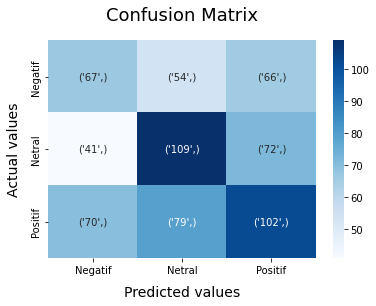

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
Evaluate_Model(LRmodel)
y_pred1 = LRmodel.predict(X_test)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred1))
print('Precision: ', precision_score(y_test, y_pred1, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred1, average='weighted'))
print('F1 Score: ', f1_score(y_test, y_pred1, average='weighted'))

Accuracy:  0.4212121212121212
Precision:  0.41977935755549733
Recall:  0.4212121212121212
F1 Score:  0.4200589565383995


**Naive Bayes**

              precision    recall  f1-score   support

          -1       0.38      0.35      0.36       187
           0       0.45      0.50      0.48       222
           1       0.41      0.40      0.41       251

    accuracy                           0.42       660
   macro avg       0.42      0.42      0.42       660
weighted avg       0.42      0.42      0.42       660



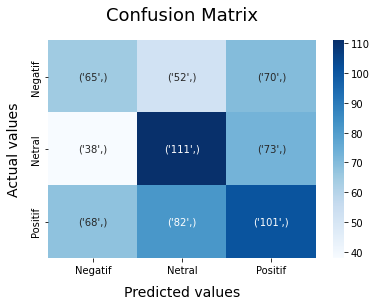

In [ ]:
NBmodel = BernoulliNB()
NBmodel.fit(X_train, y_train)
Evaluate_Model(NBmodel)
y_pred2 = NBmodel.predict(X_test)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred2))
print('Precision: ', precision_score(y_test, y_pred2, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred2, average='weighted'))
print('F1 Score: ', f1_score(y_test, y_pred2, average='weighted'))

Accuracy:  0.4196969696969697
Precision:  0.4175136426748038
Recall:  0.4196969696969697
F1 Score:  0.4179795474839427


**SVM**

              precision    recall  f1-score   support

          -1       0.37      0.33      0.35       187
           0       0.44      0.51      0.47       222
           1       0.43      0.41      0.42       251

    accuracy                           0.42       660
   macro avg       0.42      0.42      0.41       660
weighted avg       0.42      0.42      0.42       660



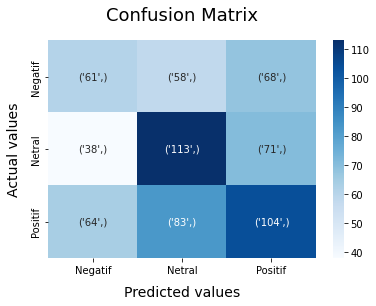

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
Evaluate_Model(SVCmodel)
y_pred3 = SVCmodel.predict(X_test)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred3))
print('Precision: ', precision_score(y_test, y_pred3, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred3, average='weighted'))
print('F1 Score: ', f1_score(y_test, y_pred3, average='weighted'))

Accuracy:  0.4212121212121212
Precision:  0.41843824686718306
Recall:  0.4212121212121212
F1 Score:  0.418591559111683


###**Social Network Analysis**

In [ ]:
# Import module yg dibutuhkan 
import warnings; warnings.simplefilter('ignore')
import time, networkx as nx

seed = 0
np.random.seed(seed)
"Done"

'Done'

In [ ]:
# Membuat List Username dan Tweet
users = df.username.to_list()
tweets = df.tweet.to_list()
print(users[:3])
print(tweets[:3])

['Fasa77342812', 'chaeryeohng', 'llhamarians']
['@SamFerkyFers10 @idextratime hebat darimana uruguay brp kali masuk final juara di tahun baru baru ada pildun dulu sekarang ga ada apa apanya,mampus kalah lagian ngapain mentri nya bakal ngibarin bendera lgbt kalo prancis menang', "@Fasa77342812 @rakkaustarina1 @idextratime Lah yg diomongin kan 'sepakbola' not their player, sepakbola jelas lebih maju eropa, negara paling banyak juara pildun aja eropa, peringkat 10 besar aja dominasi eropa, semua pemain berbakat larinya ke eropa  Gimana?", 'messi sengaja menang pildun biar bisa keluar dari paris 🤔']


In [ ]:
G = nx.Graph()
G.add_nodes_from(users)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  8633
Banyak Edges =  0


In [ ]:
# Membuat fungsi untuk melihat banyaknya user yang berinteraksi
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)
            
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  11089
Banyak Edges =  5928


In [ ]:
import operator

# Mendefinisikan fungsi centrality

def Centrality(G, N=10, method='katz', outliers=False, Label = True, layOut='shells'):
    if method.lower()=='katz':
        phi = 1.618033988749895 # largest eigenvalue of adj matrix
        ranking = nx.katz_centrality_numpy(G,1/phi)
    elif method.lower() == 'degree':
        ranking = nx.degree_centrality(G)
    elif method.lower() == 'eigen':
        ranking = nx.eigenvector_centrality_numpy(G)
    elif method.lower() =='closeness':
        ranking = nx.closeness_centrality(G)
    elif method.lower() =='betweeness':
        ranking = nx.betweenness_centrality(G)
    elif method.lower() =='harmonic':
        ranking = nx.harmonic_centrality(G)
    elif method.lower() =='percolation':
        ranking = nx.percolation_centrality(G)
    else:
        print('Error, Unsupported Method.'); return None

    important_nodes = sorted(ranking.items(), key=operator.itemgetter(1))[::-1]#[0:Nimportant]
    data = np.array([n[1] for n in important_nodes])
    dnodes = [n[0] for n in important_nodes][:N]
    if outliers:
        m = 1 # 1 standard Deviation CI
        data = data[:N]
        out = len(data[abs(data - np.mean(data)) > m * np.std(data)]) # outlier within m stDev interval
        if out<N:
            dnodes = [n for n in dnodes[:out]]

    print('Influencial Users: {0}'.format(str(dnodes)))
    print('Influencial Users Scores: {0}'.format(str(data[:len(dnodes)])))
    Gt = G.subgraph(dnodes)
    return Gt

def drawGraph(G, Label, layOut='spring', graphStyle=False, K = 200):
    if graphStyle:
        ranking = nx.degree_centrality(G)
        warna = list(ranking.values())
        d = nx.degree(G)
        d = [d[node]*K for node in G.nodes()]
        pos = nx.spring_layout(G) # Spring LayOut
        nx.draw_networkx_nodes(G,pos, node_color=warna,node_size=d) # Gambar Vertex
        nx.draw_networkx_edges(G,pos,width=2,alpha=0.1) # Gambar edges
        nx.draw_networkx_labels(G,pos) # Label Nodes
        plt.show() 
    else:
        if layOut.lower()=='spring':
            pos = nx.spring_layout(G)
        elif layOut.lower()=='circular':
            pos=nx.circular_layout(G)
        elif layOut.lower()=='random':
            pos = nx.random_layout(G)
        elif layOut.lower()=='shells':
            shells = [G.core_nodes,sorted(G.major_building_routers, key=lambda n: nx.degree(G.topo, n)) + G.distribution_routers + G.server_nodes,G.hosts + G.minor_building_routers]
            pos = nx.shell_layout(G, shells)
        elif layOut.lower()=='spectral':
            pos=nx.spectral_layout(G)
        else:
            print('Graph Type is not available.')
            return
        nx.draw_networkx_nodes(G,pos, alpha=0.2,node_color='blue',node_size=600)
        if Label:
            nx.draw_networkx_labels(G,pos)
        nx.draw_networkx_edges(G,pos,width=4)
        plt.show()

**Centrality by Degree**

Influencial Users: ['idextratime', 'convomfs', 'Askrlfess', 'FaktaSepakbola', 'The', 'SiaranBolaLive', 'tanyakanrl', 'realmadridindo1', 'utdfocusid', 'bintangemon']
Influencial Users Scores: [0.07233045 0.01623377 0.01325758 0.00892857 0.00703463 0.00667388
 0.00586219 0.00450938 0.00414863 0.00324675]


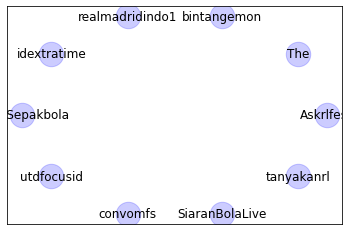

In [ ]:
Gt1 = Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')
drawGraph(Gt1, True, layOut='circular')

**Interpretasi**
* Tabel di atas menunjukkan sepuluh akun yang memiliki centrality by degree tertinggi. 
* Akun @idextratime memiliki nilai paling tinggi. 
* Selain pengguna biasa, akun autobase dan fanbase juga memberikan pengaruh yang cukup besar. 
* Salah satu comedian, aktor, dan selebriti internet, yaitu Bintang Emon juga masuk ke dalam 10 akun berpengaruh dalam penyebaran informasi mengenai Final Piala Dunia 2022.

**Closeness Centrality**

Influencial Users: ['idextratime', 'Elcapito75', 'Kirasaaa', 'udintheexplorer', 'baber168', 'Kaizephyyy', '080816_', 'nextjack1995', 'Herwinwijaya14', 'Fathorz_sii15']
Influencial Users Scores: [0.10713405 0.08468494 0.08459541 0.08450607 0.08446148 0.08357929
 0.08355748 0.08313788 0.08311629 0.08294399]


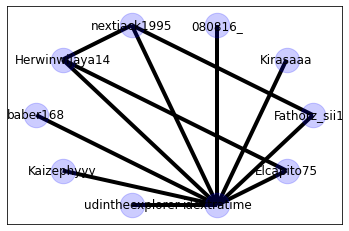

In [ ]:
Gt2 = Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')
drawGraph(Gt2, True, layOut='circular')

**Interpretasi**

* Tabel di atas menunjukkan sepuluh akun yang memiliki closeness centrality tertinggi. 
* Akun @idextratime memiliki nilai paling tinggi. 
* Akun-akun lain yang menduduki 10 akun teratas adalah akun-akun pengguna biasa.


**Betweenness Centrality**

Influencial Users: ['idextratime', 'Askrlfess', 'convomfs', 'FaktaSepakbola', 'udintheexplorer', 'SiaranBolaLive', 'The', 'tanyakanrl', 'killedbyfeb', 'comeinsideof']
Influencial Users Scores: [0.07222759 0.01568276 0.01017381 0.00794278 0.00675389 0.0065957
 0.00571694 0.00463986 0.00422221 0.00401645]


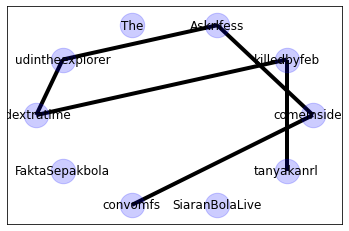

In [ ]:
Gt3 = Centrality(G, N=10, method='betweeness', outliers=False, Label = True, layOut='spring')
drawGraph(Gt3, True, layOut='circular')

**Interpretasi**
* Tabel di atas menunjukkan sepuluh akun yang memiliki nilai beetweenness centrality tertinggi.
* Seperti halnya pada centrality by degree dan closeness centrality, akun @idextratime memiliki nilai paling tinggi. 
* Selain akun pengguna biasa, akun-akun yang menduduki 10 teratas lainnya adalah akun fanbase dan autobase.

**Kesimpulan SNA**
* Dilihat dari centrality by degree, closeness centrality, dan beetweenness centrality, akun @idextratime memiliki nilai tertinggi, yaitu akun yang memiliki pengaruh besar dalam penyebaran informasi mengenai Final Piala Dunia 2022 di Twitter. 
* Akun @idextratime memiliki nilai paling tinggi, artinya akun ini memiliki jumlah retweet terbanyak, lebih cepat dalam menyampaikan informasi karena memiliki kedekatan dengan pengguna lainnya, dan unggul dalam hubungannya dengan pengguna berpengaruh lain di dalam jaringan Twitter.
* Akun @idextratime merupakan akun media berita olahraga yang aktif dalam membahas informasi terbaru terkait sepak bola dan memiliki pengikut sebanyak  574 ribu.


##**Kesimpulan**

* Sebagian besar sentimen merupakan sentimen positif, yaitu sebesar 46,1%, dengan traffic tweet pada pukul 18.00
* Kata ‘Messi’, ‘Juara’, ‘Argentina’, ‘Menang’, ‘Mbappe’ menjadi kata yang paling banyak dibicarakan
* Rata-rata tweet cenderung bersifat objektif dengan sentimen cenderung netral hingga positif
* Model terbaik yang digunakan yaitu regresi logistik karena memiliki akurasi tertinggi sebesar 42,12% dan presisi, recall, f1 score terbesar.
* Akun twitter yang berpengaruh adalah @idextratime karena memiliki jumlah retweet terbanyak, lebih cepat dalam menyampaikan informasi karena memiliki kedekatan dengan pengguna lainnya, dan unggul dalam hubungannya dengan pengguna berpengaruh lain di dalam jaringan Twitter.

##**Insight dan Rekomendasi**

* Kata ‘Messi’ dan ‘Argentina’ memiliki pengaruh yang besar pasca piala dunia, dapat dipertimbangkan untuk menjadi headline
* Waktu traffic pukul 18.00 dapat dipertimbangkan dalam social media analyst untuk meng-upload konten ataupun berita
* Akun-akun lain yang berpengaruh dalam penyebaran informasi terkait sepak bola adalah akun autobase, yaitu akun dimana pengguna dapat mengirimkan tweet secara anonim melalui direct message. Akun autobase kini berkembang pesat dan menjadi wadah masyarakat untuk beropini.
* Akun fanbase juga merupakan akun yang berpengaruh, ditandai dengan akun @FaktaSepakBola, @SiaranBolaLive, @utdfocusid, dan @realmadridindo1 yang menduduki 10 teratas akun paling berpengaruh. Dapat dikatakan terdapat tendensi bahwa sepakbola merupakan salah satu olahraga yang diminati oleh masyarakat Indonesia dan memiliki kekuatan penggemar yang besar sehingga dapat dipertimbangkan untuk media pengiklanan dengan target audiens penggemar sepak bola.

### Link Voyant Tools : https://voyant-tools.org/?corpus=567472c3819076db957413542c8bdd81


### Link Video : https://bit.ly/VideoKelompokGDatMin

### Link PPT : https://bit.ly/PPTKelompokGDatMin